# Coranvirus_Analysis

#### Analysis of Coronavirus (COVID-19) Evolution and Impact

## 1 Import, clean and format confirmed Cases

### 1.1 Data Sources

#### Source of data: https://raw.githubusercontent.com/CSSEGISandData, this is updated by John Hopkins Univiersity from a variety of government and NGO sources
#### For full list of sources see: https://systems.jhu.edu/research/public-health/ncov/
#### originally had been pulling directly from google sheets as per

#### csv_url='http://spreadsheets.google.com/ccc?key=1UF2pSkFTURko2OvfHWWlFpDFAr1UxCBA4JLwlSP6KFo&output=csv'



In [36]:


import pandas as pd
import numpy as np
import requests as rs
import pandas as pd

csv_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'

res=rs.get(url=csv_url)
open('coronavirus_stats_conf2.csv', 'wb').write(res.content)

read_conf = pd.read_csv('/Users/neil.watt/Documents/PythonScripts/Coronavirus/coronavirus_stats_conf2.csv', encoding = "ISO-8859-1")

#read_conf = pd.read_csv('/Users/neilwatt/Documents/Projects/Coronavirus/Coronavirus_Analysis/coronavirus_stats_conf2.csv', encoding = "ISO-8859-1")
#replace blank province/state with nil
read_conf['Province/State'].fillna('', inplace=True)

#replace all other NaNs with 0
read_conf.fillna(0, inplace=True)

#create new name key column
read_conf.insert(1, 'name', read_conf["Province/State"].map(str) +' '+ read_conf["Country/Region"])



### 1.2 Formatting and Cleaning Data

#### The data in the CSV file needs to be re-worked and reshaped to facilitate convenient plotting.
#### 1.  I first sliced the csv into two dataframes and then transposed the date columns (from column 5 onwards)
#### 2. Next step was to rework the cases figures into a "Cases" column according to the Date column (which is created from the index date)

In [37]:


#slice confirmed cases into two dfs in order to recombine transpose of the cases table with the regions

read_conf_copy=read_conf.copy()

#this creates a dataframe which is a slice with just the city rows (which will be replciated for each date)

new_city=read_conf_copy.iloc[:,0:5]
read_conf_copy=read_conf.copy()

#this slices the date columns from the original

#new_df2=read_conf_copy.iloc[:,6:]
new_df2=read_conf_copy.iloc[:,5:]



#transpose date and cases columnes
new_df2_T=new_df2.T


#number cities
i_points=len(read_conf.index)

#new_df2_T_1=new_df2_T.iloc[:,0:1]
new_df2_T['Date'] = new_df2_T.index

d = {}
for i in range (0,i_points):
    d[i]=new_df2_T.iloc[:,i].to_frame()
    d[i].rename(columns={ d[i].columns[0]: "Cases" }, inplace = True)
    d[i]['Date'] = d[i].index
    
   


#### Dataframes are subsequently re-combined and duplicates are eliminated

In [38]:

#recombine dataframes

dfs={}
for i in range (0,i_points):


#match with df1 based on column header
    city_row=new_city.loc[i,:].to_frame()
    city_row_T=city_row.T

#needs to be repeated same number of times as date columns
    n_times=len(d[i].index)
    city_row_T2=pd.concat([city_row_T]*n_times)


    d[i]['tmp'] = 1
    city_row_T2['tmp'] = 1

    dfs[i] = pd.merge(city_row_T2,d[i], on=['tmp'])
    dfs[i] = dfs[i].drop('tmp', axis=1)
    dfs[i]= dfs[i].drop_duplicates(subset='Date')







In [39]:


#append dataframes into master format
from datetime import datetime


final_df = pd.concat(dfs, ignore_index=True)
#in order to model number of days from onset, convert to datetime
final_df['Date_proper'] = pd.to_datetime(final_df['Date'])

#Create new days column based on number of days from first row
final_df['Day']=((final_df['Date_proper']-final_df['Date_proper'].iloc[0]).dt.total_seconds())/(24*60*60)+1


final_df.to_csv(r'Coronavirus_cases_cleaned.csv')

In [40]:

#exlcude Mainland China cases for international cases
final_df_international=final_df[final_df['Country/Region']!='Mainland China']


#mainland china df
final_df_MChina=final_df[final_df['Country/Region']=='Mainland China']

#mainland exlcuding Hubei
final_df_MChina_exHubei=final_df_MChina[final_df_MChina['Province/State']!='Hubei']




## Import, clean and format deaths and recovereries

#### import deaths

In [41]:
#import dead 

dead_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
dead_res=rs.get(url=dead_url)
open('coronavirus_stats_dead.csv', 'wb').write(dead_res.content)




#read_dead = pd.read_csv('/Users/neilwatt/Documents/Projects/Coronavirus/Coronavirus_Analysis/coronavirus_stats_dead.csv', encoding = "ISO-8859-1")
read_dead = pd.read_csv('/Users/neil.watt/Documents/PythonScripts/Coronavirus/coronavirus_stats_dead.csv', encoding = "ISO-8859-1")
#replace blank province/state with nil
read_dead['Province/State'].fillna('', inplace=True)

#replace all other NaNs with 0
read_dead.fillna(0, inplace=True)

#create new name key column
read_dead.insert(1, 'name', read_dead["Province/State"].map(str) +' '+ read_dead["Country/Region"])

#### import recovered

In [42]:
#import recovered

rec_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
rec_res=rs.get(url=rec_url)
open('coronavirus_stats_rec.csv', 'wb').write(rec_res.content)


#read_rec = pd.read_csv('/Users/neilwatt/Documents/Projects/Coronavirus/Coronavirus_Analysis/coronavirus_stats_rec.csv', encoding = "ISO-8859-1")

read_rec = pd.read_csv('/Users/neil.watt/Documents/PythonScripts/Coronavirus/coronavirus_stats_rec.csv', encoding = "ISO-8859-1")

#replace blank province/state with nil
read_rec['Province/State'].fillna('', inplace=True)

#replace all other NaNs with 0
read_rec.fillna(0, inplace=True)

#create new name key column
read_rec.insert(1, 'name', read_rec["Province/State"].map(str) +' '+ read_rec["Country/Region"])


#### format dead

In [43]:
#slice dead cases into two dfs in order to recombine transpose of the cases table with the regions

read_dead_copy=read_dead.copy()

#this creayes a dataframe which is a slice with just the city rows (which will be replciated for each date)
new_city_dead=read_dead_copy.iloc[:,0:5]
read_dead_copy=read_dead.copy()

#this slices the date columns from the original
new_df2_dead=read_dead_copy.iloc[:,5:]

#transpose date and cases columnes
new_df2_T_dead=new_df2_dead.T


#number cities
i_points_dead=len(read_dead.index)

#new_df2_T_1=new_df2_T.iloc[:,0:1]
new_df2_T_dead['Date'] = new_df2_T_dead.index

d_dead = {}
for i in range (0,i_points):
    d_dead[i]=new_df2_T_dead.iloc[:,i].to_frame()
    d_dead[i].rename(columns={ d_dead[i].columns[0]: "Cases" }, inplace = True)
    d_dead[i]['Date'] = d_dead[i].index
    

In [44]:
#recombine dataframes (deaths)

dfs_dead={}
for i in range (0,i_points_dead):


#match with df1 based on column header
    city_row_dead=new_city_dead.loc[i,:].to_frame()
    city_row_T_dead=city_row_dead.T

#needs to be repeated same number of times as date columns
    n_times_dead=len(d_dead[i].index)
    city_row_T2_dead=pd.concat([city_row_T_dead]*n_times_dead)


    d_dead[i]['tmp'] = 1
    city_row_T2_dead['tmp'] = 1

    dfs_dead[i] = pd.merge(city_row_T2_dead,d_dead[i], on=['tmp'])
    dfs_dead[i] = dfs_dead[i].drop('tmp', axis=1)
    dfs_dead[i]= dfs_dead[i].drop_duplicates(subset='Date')




In [45]:
#append dataframes into master format
from datetime import datetime


final_df_dead = pd.concat(dfs_dead, ignore_index=True)
#in order to model number of days from onset, convert to datetime
final_df_dead['Date_proper'] = pd.to_datetime(final_df_dead['Date'])

#Create new days column based on number of days from first row
final_df_dead['Day']=((final_df_dead['Date_proper']-final_df_dead['Date_proper'].iloc[0]).dt.total_seconds())/(24*60*60)+1


final_df_dead.to_csv(r'Coronavirus_cases_dead_cleaned.csv')

In [46]:
#exlcude Mainland China cases for international cases
final_df_dead_international=final_df_dead[final_df_dead['Country/Region']!='Mainland China']


#mainland china df
final_df_dead_MChina=final_df_dead[final_df_dead['Country/Region']=='Mainland China']

#mainland exlcuding Hubei
final_df_dead_MChina_exHubei=final_df_dead_MChina[final_df_dead_MChina['Province/State']!='Hubei']

#hubei
final_df_dead_MChina_Hubei=final_df_dead_MChina[final_df_dead_MChina['Province/State']=='Hubei']

#### format recoveries

In [47]:
#slice dead cases into two dfs in order to recombine transpose of the cases table with the regions

read_rec_copy=read_rec.copy()

#this creayes a dataframe which is a slice with just the city rows (which will be replciated for each date)
new_city_rec=read_rec_copy.iloc[:,0:5]
read_rec_copy=read_rec.copy()

#this slices the date columns from the original
new_df2_rec=read_rec_copy.iloc[:,5:]

#transpose date and cases columnes
new_df2_T_rec=new_df2_rec.T


#number cities
i_points_rec=len(read_rec.index)

#new_df2_T_1=new_df2_T.iloc[:,0:1]
new_df2_T_rec['Date'] = new_df2_T_rec.index

d_rec = {}
for i in range (0,i_points):
    d_rec[i]=new_df2_T_rec.iloc[:,i].to_frame()
    d_rec[i].rename(columns={ d_rec[i].columns[0]: "Cases" }, inplace = True)
    d_rec[i]['Date'] = d_rec[i].index
    

In [48]:
#recombine dataframes (deaths)

dfs_rec={}
for i in range (0,i_points_rec):


#match with df1 based on column header
    city_row_rec=new_city_rec.loc[i,:].to_frame()
    city_row_T_rec=city_row_rec.T

#needs to be repeated same number of times as date columns
    n_times_rec=len(d_rec[i].index)
    city_row_T2_rec=pd.concat([city_row_T_rec]*n_times_rec)


    d_rec[i]['tmp'] = 1
    city_row_T2_rec['tmp'] = 1

    dfs_rec[i] = pd.merge(city_row_T2_rec,d_rec[i], on=['tmp'])
    dfs_rec[i] = dfs_rec[i].drop('tmp', axis=1)
    dfs_rec[i]= dfs_rec[i].drop_duplicates(subset='Date')


In [49]:
#append dataframes into master format
from datetime import datetime


final_df_rec = pd.concat(dfs_rec, ignore_index=True)
#in order to model number of days from onset, convert to datetime
final_df_rec['Date_proper'] = pd.to_datetime(final_df_rec['Date'])

#Create new days column based on number of days from first row
final_df_rec['Day']=((final_df_rec['Date_proper']-final_df_rec['Date_proper'].iloc[0]).dt.total_seconds())/(24*60*60)+1


final_df_rec.to_csv(r'Coronavirus_cases_rec_cleaned.csv')

In [50]:
#exlcude Mainland China cases for international cases
final_df_rec_international=final_df_rec[final_df_rec['Country/Region']!='Mainland China']


#mainland china df
final_df_rec_MChina=final_df_rec[final_df_rec['Country/Region']=='Mainland China']

#mainland exlcuding Hubei
final_df_rec_MChina_exHubei=final_df_rec_MChina[final_df_rec_MChina['Province/State']!='Hubei']

#hubei
final_df_rec_MChina_Hubei=final_df_rec_MChina[final_df_rec_MChina['Province/State']=='Hubei']

### Defining Dataframes

In [51]:

### adding top regions by number of cases for further analysis


#hubei
final_df_MChina_Hubei=final_df_MChina[final_df_MChina['Province/State']=='Hubei']

#Guangdong
final_df_MChina_Guangdong=final_df_MChina[final_df_MChina['Province/State']=='Guangdong']
#Zhejiang
final_df_MChina_Zhejiang=final_df_MChina[final_df_MChina['Province/State']=='Zhejiang']
#Henan
final_df_MChina_Henan=final_df_MChina[final_df_MChina['Province/State']=='Henan']

#Hunan
final_df_MChina_Hunan=final_df_MChina[final_df_MChina['Province/State']=='Hunan']

#Anhui
final_df_MChina_Anhui=final_df_MChina[final_df_MChina['Province/State']=='Anhui']


#Jiangxi
final_df_MChina_Jiangxi=final_df_MChina[final_df_MChina['Province/State']=='Jiangxi']

## Plotting Deaths and Recoveries vs Cases

In [52]:
final_df_dead_MChina_Hubei['% Dead']=final_df_dead_MChina_Hubei['Cases']/final_df_MChina_Hubei['Cases']*100

final_df_rec_MChina_Hubei['% Rec']=final_df_rec_MChina_Hubei['Cases']/final_df_MChina_Hubei['Cases']*100


#Hubei Deaths vs cases

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=final_df_dead_MChina_Hubei['Date'], y=final_df_dead_MChina_Hubei['% Dead'], name="% Hubei Deaths"),
    secondary_y=False,
)

# Add traces
fig.add_trace(
    go.Scatter(x=final_df_MChina_Hubei['Date'], y=final_df_rec_MChina_Hubei['% Rec'], name="% Hubei Recoveries"),
    secondary_y=False,
)

#fig.add_trace(
 #   go.Scatter(x=final_df_MChina_Hubei['Date'], y=final_df_MChina_Hubei['Cases'], name="Hubei Cases"),
  #  secondary_y=True,
#)

# Add figure title
fig.update_layout(
    title_text="Hubei % Recoveries and Deaths"
)



# Set y-axes titles
fig.update_yaxes(title_text="% Deaths and Recoveries", secondary_y=False)
#fig.update_yaxes(title_text="Cases", secondary_y=True)

fig.show()

C:\Users\neil.watt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\neil.watt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [53]:
#Hubei Deaths vs cases

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=final_df_dead_MChina_Hubei['Date'], y=final_df_dead_MChina_Hubei['Cases'], name="Hubei Deaths"),
    secondary_y=False,
)

# Add traces
fig.add_trace(
    go.Scatter(x=final_df_MChina_Hubei['Date'], y=final_df_rec_MChina_Hubei['Cases'], name="Hubei Recoveries"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=final_df_MChina_Hubei['Date'], y=final_df_MChina_Hubei['Cases'], name="Hubei Cases"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Hubei Coronavirus Cases vs Recoveries and Deaths"
)



# Set y-axes titles
fig.update_yaxes(title_text="Deaths and Recoveries", secondary_y=False)
fig.update_yaxes(title_text="Cases", secondary_y=True)

fig.show()

In [54]:
#Hubei Deaths vs cases

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=final_df_dead_MChina_Hubei['Date'], y=final_df_dead_MChina_Hubei['Cases'], name="Hubei Deaths"),
    secondary_y=False,
)

# Add traces
fig.add_trace(
    go.Scatter(x=final_df_MChina_Hubei['Date'], y=final_df_rec_MChina_Hubei['Cases'], name="Hubei Recoveries"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=final_df_MChina_Hubei['Date'], y=final_df_MChina_Hubei['Cases'], name="Hubei Cases"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Hubei Coronavirus Cases vs Recoveries and Deaths"
)



# Set y-axes titles
fig.update_yaxes(title_text="Deaths and Recoveries", secondary_y=False)
fig.update_yaxes(title_text="Cases", secondary_y=True)

fig.show()



In [55]:
#mainland excluding Hubei
import plotly.express as px


fig = px.line(final_df_dead_MChina_exHubei,title="Mainland China Reported Coronavirus Deaths (excl Hubei)", x="Date", y="Cases", color="name", line_group="name", hover_name="name",render_mode="svg")
fig.for_each_trace(lambda t: t.update(name=t.name.replace("name=", "")))
fig.show()

## Plotting Cases by Geography

In [56]:
import  plotly.express as px
#https://plot.ly/python-api-reference/generated/plotly.express.scatter_geo.html
scale=0.1




fig = px.scatter_geo(final_df_MChina , lat="Lat",lon="Long",
                    color="Cases",
                    #size="Cases",
                     size_max=70,
                    size='Cases',
                     #size="Cases",
                     title="Coronavirus Cases by Day (Mainland China))",
                     
                   hover_name="name", 
                     #labels="name",
                    color_continuous_scale=px.colors.sequential.RdBu[::-1],
                     # color_continuous_scale=px.colors.sequential.Plasma,
                     #plotly.express.colors.diverging
                    animation_frame="Date"
                    
                    
                    )
fig.show()

In [57]:
#non Mainland China only

import  plotly.express as px
#https://plot.ly/python-api-reference/generated/plotly.express.scatter_geo.html




fig = px.scatter_geo(final_df_international , lat="Lat",lon="Long",
                    color="Cases",
                    #size="Cases",
                     size_max=40,
                    size='Cases',
                     #size="Cases",
                     title="Coronavirus Cases by Day (exl Mainland CN))",
                     
                   hover_name="name", 
                     #labels="name",
                  #  color_continuous_scale=px.colors.sequential.RdBu[::-1],
                    # color_continuous_scale=px.colors.sequential.RdBu[::-1],
                     # color_continuous_scale=px.colors.sequential.Plasma,
                     #plotly.express.colors.diverging
                    animation_frame="Date"
                   
                    
                    
                    )
fig.show()

In [58]:

# plot of international cases

import plotly.express as px


fig = px.line(final_df_international,title="International Cases", x="Date", y="Cases", color="name", line_group="name", hover_name="name",render_mode="svg")
fig.for_each_trace(lambda t: t.update(name=t.name.replace("name=", "")))
fig.show()

In [59]:

df_italy=final_df_international[final_df_international['Country/Region']=='Italy']
                                
df_italy.head()

Province/State    name Country/Region Lat Long  Cases     Date  \
2726                  Italy          Italy  43   12      0  1/22/20   
2727                  Italy          Italy  43   12      0  1/23/20   
2728                  Italy          Italy  43   12      0  1/24/20   
2729                  Italy          Italy  43   12      0  1/25/20   
2730                  Italy          Italy  43   12      0  1/26/20   

     Date_proper  Day  
2726  2020-01-22  1.0  
2727  2020-01-23  2.0  
2728  2020-01-24  3.0  
2729  2020-01-25  4.0  
2730  2020-01-26  5.0

In [60]:
df_top=final_df_international[final_df_international['Country/Region'].isin(['South Korea','Italy','Iran','Japan','France','Germany','Spain'
,'Singapore'
,'Hong Kong'
,'Kuwait'
,'Switzerland'
,'UK'
])]
df_top.head()

      
      

Province/State    name Country/Region Lat Long  Cases     Date  \
1504                  Japan          Japan  36  138      2  1/22/20   
1505                  Japan          Japan  36  138      1  1/23/20   
1506                  Japan          Japan  36  138      2  1/24/20   
1507                  Japan          Japan  36  138      2  1/25/20   
1508                  Japan          Japan  36  138      4  1/26/20   

     Date_proper  Day  
1504  2020-01-22  1.0  
1505  2020-01-23  2.0  
1506  2020-01-24  3.0  
1507  2020-01-25  4.0  
1508  2020-01-26  5.0

#### International Cases 

In [61]:
final_df_international=final_df[final_df['Country/Region']!='Mainland China']


In [62]:
# plot of ex Mainland cases (total)


#exlcude Mainland China cases for international cases
#final_df_international=final_df[final_df['Country/Region']!='Mainland China']

final_df_international['total_cases']=final_df_international['Cases'].groupby(final_df_international['Date']).transform('sum')

final_df_international


#df_international=final_df_international[final_df_international['Country/Region'].isin(['South Korea','Italy','Iran','Japan','France','Germany','Spain'

           
#df_international=df[-df["column"].isin(["value"])]
                                                                                    

C:\Users\neil.watt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Province/State                   name Country/Region     Lat  \
1457                                    Thailand       Thailand      15   
1458                                    Thailand       Thailand      15   
1459                                    Thailand       Thailand      15   
1460                                    Thailand       Thailand      15   
1461                                    Thailand       Thailand      15   
1462                                    Thailand       Thailand      15   
1463                                    Thailand       Thailand      15   
1464                                    Thailand       Thailand      15   
1465                                    Thailand       Thailand      15   
1466                                    Thailand       Thailand      15   
1467                                    Thailand       Thailand      15   
1468                                    Thailand       Thailand      15   
1469                                    Thailand       Thailand      15   
1470                                    Thailand       Thailand      15   
1471                                    Thailand       Thailand      15   
1472                                    Thailand       Thailand      15   
1473                                    Thailand       Thailand      15   
1474                                    Thailand       Thailand      15   
1475                                    Thailand       Thailand      15   
1476                                    Thailand       Thailand      15   
1477                                    Thailand       Thailand      15   
1478                                    Thailand       Thailand      15   
1479                                    Thailand       Thailand      15   
1480                                    Thailand       Thailand      15   
1481                                    Thailand       Thailand      15   
1482                                    Thailand       Thailand      15   
1483                                    Thailand       Thailand      15   
1484                                    Thailand       Thailand      15   
1485                                    Thailand       Thailand      15   
1486                                    Thailand       Thailand      15   
...                   ...                    ...            ...     ...   
11955  Volusia County, FL  Volusia County, FL US             US  29.028   
11956  Volusia County, FL  Volusia County, FL US             US  29.028   
11957  Volusia County, FL  Volusia County, FL US             US  29.028   
11958  Volusia County, FL  Volusia County, FL US             US  29.028   
11959  Volusia County, FL  Volusia County, FL US             US  29.028   
11960  Volusia County, FL  Volusia County, FL US             US  29.028   
11961  Volusia County, FL  Volusia County, FL US             US  29.028   
11962  Volusia County, FL  Volusia County, FL US             US  29.028   
11963  Volusia County, FL  Volusia County, FL US             US  29.028   
11964  Volusia County, FL  Volusia County, FL US             US  29.028   
11965  Volusia County, FL  Volusia County, FL US             US  29.028   
11966  Volusia County, FL  Volusia County, FL US             US  29.028   
11967  Volusia County, FL  Volusia County, FL US             US  29.028   
11968  Volusia County, FL  Volusia County, FL US             US  29.028   
11969  Volusia County, FL  Volusia County, FL US             US  29.028   
11970  Volusia County, FL  Volusia County, FL US             US  29.028   
11971  Volusia County, FL  Volusia County, FL US             US  29.028   
11972  Volusia County, FL  Volusia County, FL US             US  29.028   
11973  Volusia County, FL  Volusia County, FL US             US  29.028   
11974  Volusia County, FL  Volusia County, FL US             US  29.028   
11975  Volusia County, FL  Volusia County, FL US             US  29.028   
11976  Volusia County, FL  Volusia C

In [63]:

import plotly.express as px


fig = px.line(final_df_international,title="International Cases outside Mainland China", x="Date", y="total_cases", color="name", line_group="name", render_mode="svg")
fig.for_each_trace(lambda t: t.update(name=t.name.replace("name=", "")))
fig.show()

In [64]:
df_top=final_df_international[final_df_international['Country/Region'].isin(['South Korea','Italy','Iran','Japan','France','Germany','Spain'
,'Singapore'
,'Hong Kong'
,'Kuwait'
,'Switzerland'
,'UK'
])]
df_top.head()


Province/State    name Country/Region Lat Long  Cases     Date  \
1504                  Japan          Japan  36  138      2  1/22/20   
1505                  Japan          Japan  36  138      1  1/23/20   
1506                  Japan          Japan  36  138      2  1/24/20   
1507                  Japan          Japan  36  138      2  1/25/20   
1508                  Japan          Japan  36  138      4  1/26/20   

     Date_proper  Day  total_cases  
1504  2020-01-22  1.0            8  
1505  2020-01-23  2.0           14  
1506  2020-01-24  3.0           25  
1507  2020-01-25  4.0           35  
1508  2020-01-26  5.0           56

In [65]:




# plot of international cases- 



import plotly.express as px


fig = px.line(df_top,title="International Cases (top 12)", x="Date", y="Cases", color="name", line_group="name", hover_name="name",render_mode="svg")
fig.for_each_trace(lambda t: t.update(name=t.name.replace("name=", "")))
fig.show()

#### International Cases (% Deaths/Cases)

In [66]:

#df_top=final_df_international[final_df_international['Country/Region'].isin(top_list)]

final_df_dead_international.head()

Province/State       name Country/Region Lat Long  Cases     Date  \
1457                  Thailand       Thailand  15  101      0  1/22/20   
1458                  Thailand       Thailand  15  101      0  1/23/20   
1459                  Thailand       Thailand  15  101      0  1/24/20   
1460                  Thailand       Thailand  15  101      0  1/25/20   
1461                  Thailand       Thailand  15  101      0  1/26/20   

     Date_proper  Day  
1457  2020-01-22  1.0  
1458  2020-01-23  2.0  
1459  2020-01-24  3.0  
1460  2020-01-25  4.0  
1461  2020-01-26  5.0

In [67]:

top_list=['South Korea','Italy','Iran','Japan','France','Germany','Spain'
,'Singapore'
,'Hong Kong'
,'Kuwait'
,'Switzerland'
,'UK']



df_top=final_df_international[final_df_international['Country/Region'].isin(top_list)]
df_top_deaths=final_df_dead_international[final_df_dead_international['Country/Region'].isin(top_list)]


df_top['%_Dead']=df_top_deaths['Cases']/df_top['Cases']*100



#final_df_dead_MChina_Hubei['% Dead']=final_df_dead_MChina_Hubei['Cases']/final_df_MChina_Hubei['Cases']*100
#final_df_rec_MChina_Hubei['% Rec']=final_df_rec_MChina_Hubei['Cases']/final_df_MChina_Hubei['Cases']*100



#df_deathrate=df_top_deaths/df_top_cases
                                          
#df_deathrate.head()

C:\Users\neil.watt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [68]:

# plot of international cases- 

#define DF deaths/cases




import plotly.express as px


fig = px.line(df_top,title="International Death/Case % (top 12)", x="Date", y="%_Dead", color="name", line_group="name", hover_name="name",render_mode="svg")
fig.for_each_trace(lambda t: t.update(name=t.name.replace("name=", "")))
fig.show()


In [69]:

import plotly.express as px


fig = px.line(final_df_MChina_exHubei,title="Mainland China Reported Coronavirus Cases (excl Hubei)", x="Date", y="Cases", color="name", line_group="name", hover_name="name",render_mode="svg")
fig.for_each_trace(lambda t: t.update(name=t.name.replace("name=", "")))
fig.show()

In [70]:



fig = px.line(final_df_MChina_Hubei,title="Hubei Coronavirus Cases", x="Date", y="Cases", color="name", line_group="name", hover_name="name",render_mode="svg")
fig.for_each_trace(lambda t: t.update(name=t.name.replace("name=", "")))
fig.show()

## Distribution of Cases

In [71]:
#define exponential function

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def func(x, a, b):
    return a * np.exp(b * x) 



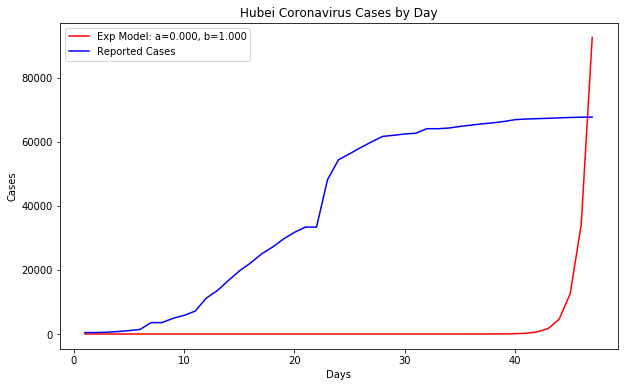

In [72]:
#conf range https://lmfit.github.io/lmfit-py/model.html

Cases=final_df_MChina_Hubei['Cases']
Days=final_df_MChina_Hubei['Day']

#empirical data
xdata = Days
y = Cases
ydata = y




popt, pcov = curve_fit(func, xdata, ydata)


fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(xdata, func(xdata, *popt), 'r-',label='Exp Model: a=%5.3f, b=%5.3f' % tuple(popt))
ax.plot(xdata, ydata, 'b-', label='Reported Cases')
plt.xlabel('Days')
plt.ylabel('Cases')
ax.set_title('Hubei Coronavirus Cases by Day')
ax.legend()

In [73]:
final_df_MChina_Hubei.head()

Province/State                  name  Country/Region      Lat     Long  \
564          Hubei  Hubei Mainland China  Mainland China  30.9756  112.271   
565          Hubei  Hubei Mainland China  Mainland China  30.9756  112.271   
566          Hubei  Hubei Mainland China  Mainland China  30.9756  112.271   
567          Hubei  Hubei Mainland China  Mainland China  30.9756  112.271   
568          Hubei  Hubei Mainland China  Mainland China  30.9756  112.271   

     Cases     Date Date_proper  Day  
564    444  1/22/20  2020-01-22  1.0  
565    444  1/23/20  2020-01-23  2.0  
566    549  1/24/20  2020-01-24  3.0  
567    761  1/25/20  2020-01-25  4.0  
568   1058  1/26/20  2020-01-26  5.0

## Forecasting Future Cases

In [74]:
 

final_df_MChina_Hubei['y']=final_df_MChina_Hubei['Cases']
final_df_MChina_Hubei['ds']=final_df_MChina_Hubei['Date']


#Guangdong
final_df_MChina_Guangdong['y']=final_df_MChina_Guangdong['Cases']
final_df_MChina_Guangdong['ds']=final_df_MChina_Guangdong['Date']

#Zhejiang
final_df_MChina_Zhejiang['y']=final_df_MChina_Zhejiang['Cases']
final_df_MChina_Zhejiang['ds']=final_df_MChina_Zhejiang['Date']

#Henan
final_df_MChina_Henan['y']=final_df_MChina_Henan['Cases']
final_df_MChina_Henan['ds']=final_df_MChina_Henan['Date']

#Hunan
final_df_MChina_Hunan['y']=final_df_MChina_Hunan['Cases']
final_df_MChina_Hunan['ds']=final_df_MChina_Hunan['Date']

#Anhui
final_df_MChina_Anhui['y']=final_df_MChina_Anhui['Cases']
final_df_MChina_Anhui['ds']=final_df_MChina_Anhui['Date']

#Jiangxi
final_df_MChina_Jiangxi['y']=final_df_MChina_Jiangxi['Cases']
final_df_MChina_Jiangxi['ds']=final_df_MChina_Jiangxi['Date']




C:\Users\neil.watt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\neil.watt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\neil.watt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [109]:

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot


#NOTE, DEFAULT changepoint_prior_scale IS 0.05, DECREASING makes less flexible, INCREASIGN makes more flexible
changepoint_prior_scale_new=0.05
periods_new=30


df_Hubei=final_df_MChina_Hubei
gm_prophet = Prophet(interval_width=0.95, changepoint_prior_scale=changepoint_prior_scale_new)
gm_prophet.fit(df_Hubei)
future = gm_prophet.make_future_dataframe(periods=periods_new)



#Guangdong

df_Guangdong=final_df_MChina_Guangdong
gm_prophet_Guangdong = Prophet(interval_width=0.95, changepoint_prior_scale=changepoint_prior_scale_new)
gm_prophet_Guangdong.fit(df_Guangdong)
future_Guangdong = gm_prophet_Guangdong.make_future_dataframe(periods=periods_new)


#Zhejiang
df_Zhejiang=final_df_MChina_Zhejiang
gm_prophet_Zhejiang = Prophet(interval_width=0.95, changepoint_prior_scale=changepoint_prior_scale_new)
gm_prophet_Zhejiang.fit(df_Zhejiang)
future_Zhejiang = gm_prophet_Zhejiang.make_future_dataframe(periods=periods_new)


#Henan
df_Henan=final_df_MChina_Henan
gm_prophet_Henan = Prophet(interval_width=0.95, changepoint_prior_scale=changepoint_prior_scale_new)
gm_prophet_Henan.fit(df_Henan)
future_Henan = gm_prophet_Henan.make_future_dataframe(periods=periods_new)



#Hunan
df_Hunan=final_df_MChina_Hunan
gm_prophet_Hunan = Prophet(interval_width=0.95, changepoint_prior_scale=changepoint_prior_scale_new)
gm_prophet_Hunan.fit(df_Hunan)
future_Hunan = gm_prophet_Hunan.make_future_dataframe(periods=periods_new)


#Anhui
df_Anhui=final_df_MChina_Anhui
gm_prophet_Anhui = Prophet(interval_width=0.95, changepoint_prior_scale=changepoint_prior_scale_new)
gm_prophet_Anhui.fit(df_Anhui)
future_Anhui = gm_prophet_Anhui.make_future_dataframe(periods=periods_new)


#Jiangxi
df_Jiangxi=final_df_MChina_Jiangxi
gm_prophet_Jiangxi = Prophet(interval_width=0.95, changepoint_prior_scale=changepoint_prior_scale_new)
gm_prophet_Jiangxi.fit(df_Jiangxi)
future_Jiangxi = gm_prophet_Jiangxi.make_future_dataframe(periods=periods_new)





INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\neil.watt\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:f

In [110]:
#create forecast with upper and lower bounds
forecast = gm_prophet.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

#Guangdong
forecast_Guangdong = gm_prophet_Guangdong.predict(future_Guangdong)


#Zhejiang
forecast_Zhejiang = gm_prophet_Zhejiang.predict(future_Zhejiang)

#Henan

forecast_Henan = gm_prophet_Henan.predict(future_Henan)

#Hunan
forecast_Hunan = gm_prophet_Hunan.predict(future_Hunan)


#Anhui
forecast_Anhui = gm_prophet_Anhui.predict(future_Anhui)

#Jiangxi
forecast_Jiangxi = gm_prophet_Jiangxi.predict(future_Jiangxi)




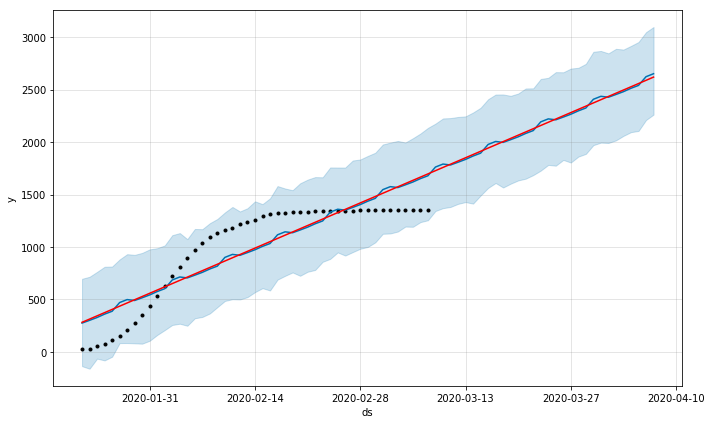

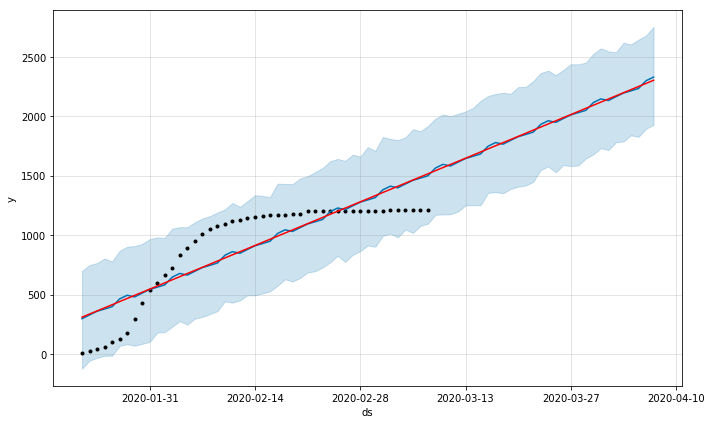

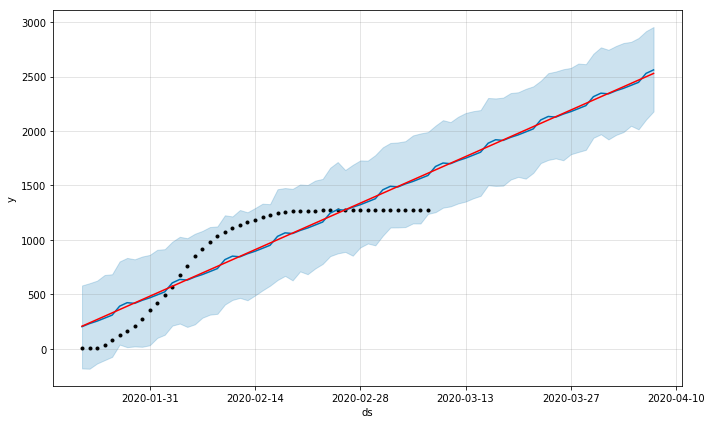

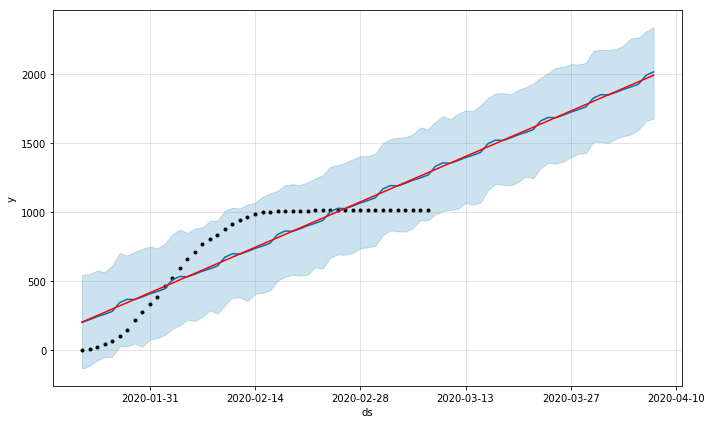

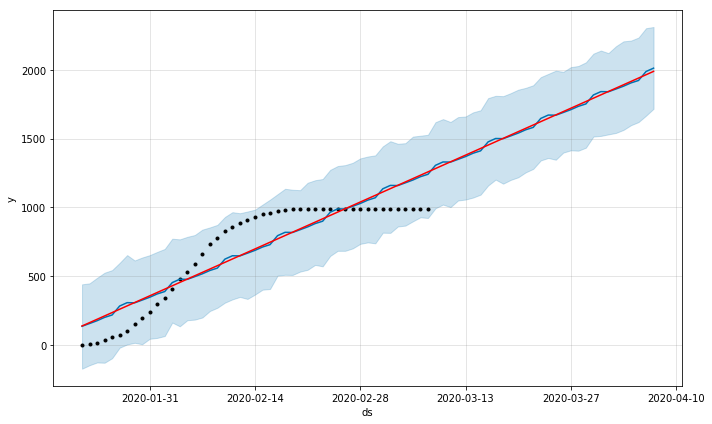

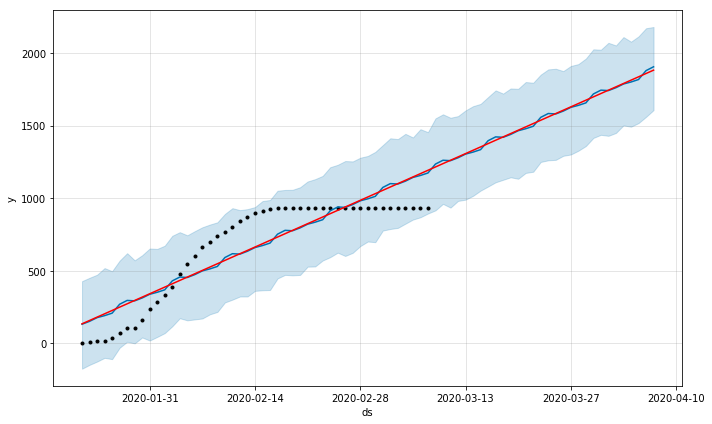

In [111]:






fig_Guangdong = gm_prophet_Guangdong.plot(forecast_Guangdong)
changepoints_Guangdong = add_changepoints_to_plot(fig_Guangdong.gca(), gm_prophet_Guangdong, forecast_Guangdong)


fig_Zhejiang = gm_prophet_Zhejiang.plot(forecast_Zhejiang)
changepoints_Zhejiang = add_changepoints_to_plot(fig_Zhejiang.gca(), gm_prophet_Zhejiang, forecast_Zhejiang)

fig_Henan = gm_prophet_Henan.plot(forecast_Henan)
changepoints_Henan = add_changepoints_to_plot(fig_Henan.gca(), gm_prophet_Henan, forecast_Henan)


fig_Hunan = gm_prophet_Hunan.plot(forecast_Hunan)
changepoints_Hunan = add_changepoints_to_plot(fig_Hunan.gca(), gm_prophet_Hunan, forecast_Hunan)


fig_Anhui = gm_prophet_Anhui.plot(forecast_Anhui)
changepoints_Anhui = add_changepoints_to_plot(fig_Anhui.gca(), gm_prophet_Anhui, forecast_Anhui)


fig_Jiangxi = gm_prophet_Jiangxi.plot(forecast_Jiangxi)
changepoints_Jiangxi = add_changepoints_to_plot(fig_Jiangxi.gca(), gm_prophet_Jiangxi, forecast_Jiangxi)

#### Comparing trajectory of new cases for various provinces (Mainland China)

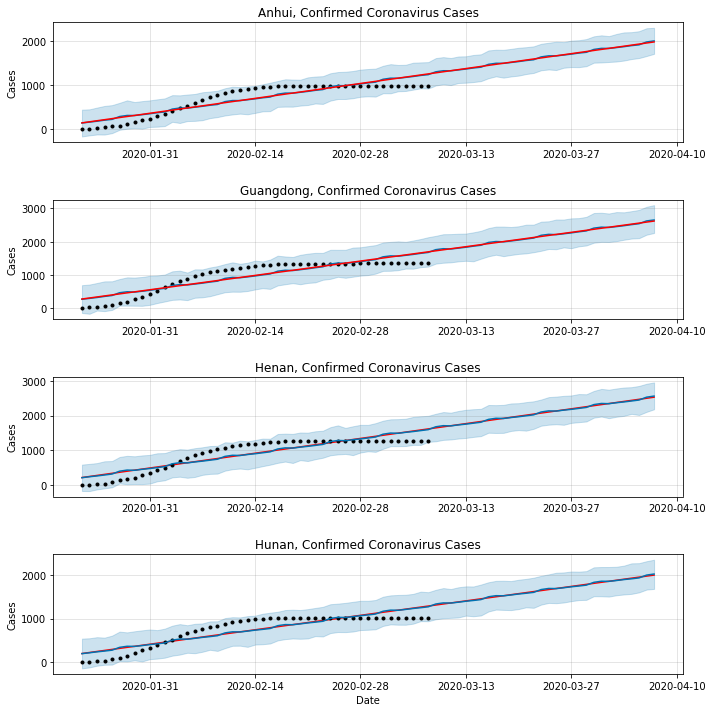

In [112]:

# plot major provinces showing similar change in trend (after redfinition of "infected")
#https://www.taiwannews.com.tw/en/news/3874490

fig = plt.figure(figsize=(10, 10))


ax1 = fig.add_subplot(4, 1, 1)
gm_prophet_Anhui.plot(forecast_Anhui, ax=ax1)
ax1.set_title('Anhui, Confirmed Coronavirus Cases')
changepoints = add_changepoints_to_plot(fig.gca(), gm_prophet_Anhui, forecast_Anhui)



ax2 = fig.add_subplot(4, 1, 2)
gm_prophet_Guangdong.plot(forecast_Guangdong, ax=ax2)
changepoints_Guangdong = add_changepoints_to_plot(fig.gca(), gm_prophet_Guangdong, forecast_Guangdong)
ax2.set_title('Guangdong, Confirmed Coronavirus Cases')

ax3 = fig.add_subplot(4, 1, 3)
changepoints_Henan = add_changepoints_to_plot(fig.gca(), gm_prophet_Henan, forecast_Henan)
gm_prophet_Henan.plot(forecast_Henan, ax=ax3)
ax3.set_title('Henan, Confirmed Coronavirus Cases')



ax4 = fig.add_subplot(4, 1, 4)
changepoints_Hunan = add_changepoints_to_plot(fig.gca(), gm_prophet_Hunan, forecast_Hunan)
gm_prophet_Hunan.plot(forecast_Hunan, ax=ax4)
ax4.set_title('Hunan, Confirmed Coronavirus Cases')




axes = fig.get_axes()
axes[0].set_xlabel('')
axes[0].set_ylabel('Cases')
axes[1].set_xlabel('')
axes[1].set_ylabel('Cases')
axes[2].set_xlabel('')
axes[2].set_ylabel('Cases')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Cases')

fig.savefig('temp.png', dpi=100)


Text(39.125,0.5,'Cases')

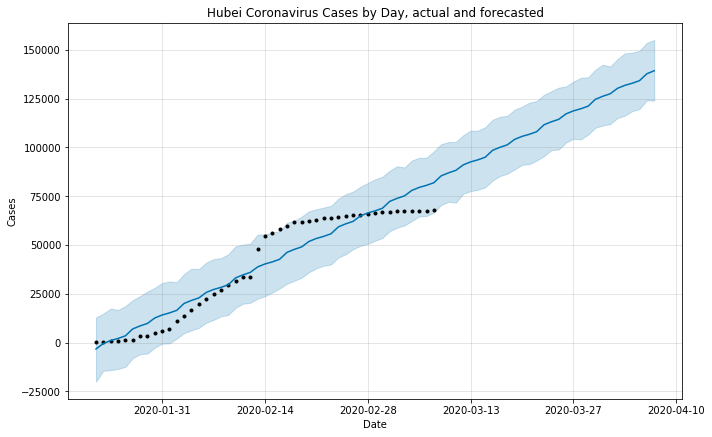

In [113]:
fig1 = gm_prophet.plot(forecast)
plt.title('Hubei Coronavirus Cases by Day, actual and forecasted');
axes = fig1.get_axes()
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Cases')


Text(39.125,0.5,'Cases')

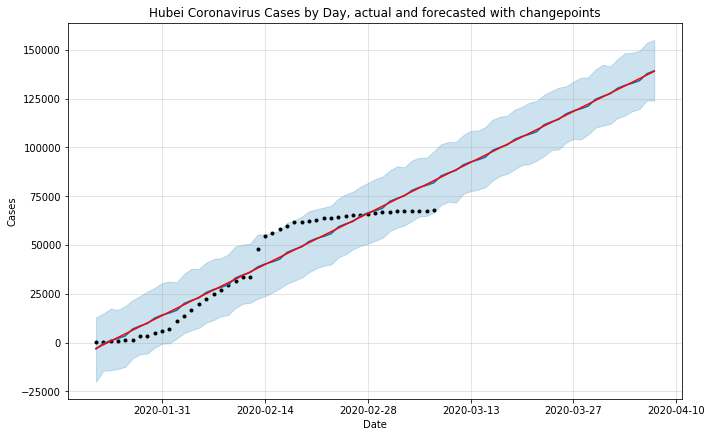

In [114]:
#added change points to forecast
from fbprophet.plot import add_changepoints_to_plot
fig2= gm_prophet.plot(forecast)
a = add_changepoints_to_plot(fig2.gca(), gm_prophet, forecast)
plt.title('Hubei Coronavirus Cases by Day, actual and forecasted with changepoints');
axes = fig2.get_axes()
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Cases')





### Forecast International Cases (ex Mainland China)

In [148]:
final_df_international['Date'][30:,]

1487     2/21/20
1488     2/22/20
1489     2/23/20
1490     2/24/20
1491     2/25/20
1492     2/26/20
1493     2/27/20
1494     2/28/20
1495     2/29/20
1496      3/1/20
1497      3/2/20
1498      3/3/20
1499      3/4/20
1500      3/5/20
1501      3/6/20
1502      3/7/20
1503      3/8/20
1504     1/22/20
1505     1/23/20
1506     1/24/20
1507     1/25/20
1508     1/26/20
1509     1/27/20
1510     1/28/20
1511     1/29/20
1512     1/30/20
1513     1/31/20
1514      2/1/20
1515      2/2/20
1516      2/3/20
          ...   
11955     2/8/20
11956     2/9/20
11957    2/10/20
11958    2/11/20
11959    2/12/20
11960    2/13/20
11961    2/14/20
11962    2/15/20
11963    2/16/20
11964    2/17/20
11965    2/18/20
11966    2/19/20
11967    2/20/20
11968    2/21/20
11969    2/22/20
11970    2/23/20
11971    2/24/20
11972    2/25/20
11973    2/26/20
11974    2/27/20
11975    2/28/20
11976    2/29/20
11977     3/1/20
11978     3/2/20
11979     3/3/20
11980     3/4/20
11981     3/5/20
11982     3/6/

In [149]:
final_df_international_adjust = final_df_international[(final_df_international['Date'] > '2/23/20') ]
final_df_international_adjust

Province/State                     name Country/Region      Lat  \
1469                                        Thailand       Thailand       15   
1470                                        Thailand       Thailand       15   
1471                                        Thailand       Thailand       15   
1472                                        Thailand       Thailand       15   
1473                                        Thailand       Thailand       15   
1474                                        Thailand       Thailand       15   
1475                                        Thailand       Thailand       15   
1490                                        Thailand       Thailand       15   
1491                                        Thailand       Thailand       15   
1492                                        Thailand       Thailand       15   
1493                                        Thailand       Thailand       15   
1494                                        Thailand       Thailand       15   
1495                                        Thailand       Thailand       15   
1496                                        Thailand       Thailand       15   
1497                                        Thailand       Thailand       15   
1498                                        Thailand       Thailand       15   
1499                                        Thailand       Thailand       15   
1500                                        Thailand       Thailand       15   
1501                                        Thailand       Thailand       15   
1502                                        Thailand       Thailand       15   
1503                                        Thailand       Thailand       15   
1516                                           Japan          Japan       36   
1517                                           Japan          Japan       36   
1518                                           Japan          Japan       36   
1519                                           Japan          Japan       36   
1520                                           Japan          Japan       36   
1521                                           Japan          Japan       36   
1522                                           Japan          Japan       36   
1537                                           Japan          Japan       36   
1538                                           Japan          Japan       36   
...                     ...                      ...            ...      ...   
11929  Unknown Location, MA  Unknown Location, MA US             US  42.4072   
11930  Unknown Location, MA  Unknown Location, MA US             US  42.4072   
11931  Unknown Location, MA  Unknown Location, MA US             US  42.4072   
11932  Unknown Location, MA  Unknown Location, MA US             US  42.4072   
11933  Unknown Location, MA  Unknown Location, MA US             US  42.4072   
11934  Unknown Location, MA  Unknown Location, MA US             US  42.4072   
11935  Unknown Location, MA  Unknown Location, MA US             US  42.4072   
11936  Unknown Location, MA  Unknown Location, MA US             US  42.4072   
11937  Unknown Location, MA  Unknown Location, MA US             US  42.4072   
11950    Volusia County, FL    Volusia County, FL US             US   29.028   
11951    Volusia County, FL    Volusia County, FL US             US   29.028   
11952    Volusia County, FL    Volusia County, FL US             US   29.028   
11953    Volusia County, FL    Volusia County, FL US             US   29.028   
11954    Volusia County, FL    Volusia County, FL US             US   29.028   
11955    Volusia County, FL    Volusia County, FL US             US   29.028   
11956    Volusia County, FL    Volusia County, FL US             US   29.028   
11971    Volusia County, FL    Volusia County, FL US             US   29.028   
11972    Volusia County, FL    Volusia County, FL US             US   29.028   
11973    Volu

In [167]:

final_df_international_adjust = final_df_international[(final_df_international['Date'] > '2020-02-20') ]
final_df_international_adjust['y']=final_df_international_adjust['total_cases']
final_df_international_adjust['ds']=final_df_international_adjust['Date']


C:\Users\neil.watt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\neil.watt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [168]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

#NOTE, DEFAULT changepoint_prior_scale IS 0.05, DECREASING makes less flexible, INCREASIGN makes more flexible

changepoint_prior_scale_new_int=0.05
periods_new_int=30


In [169]:
#df_Hubei=final_df_MChina_Hubei
gm_prophet_int = Prophet(interval_width=0.95, changepoint_prior_scale=changepoint_prior_scale_new_int)
gm_prophet_int.fit(final_df_international_adjust)
future_int = gm_prophet_int.make_future_dataframe(periods=periods_new_int)

forecast_int = gm_prophet_int.predict(future_int)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\neil.watt\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



Text(41.25,0.5,'Cases')

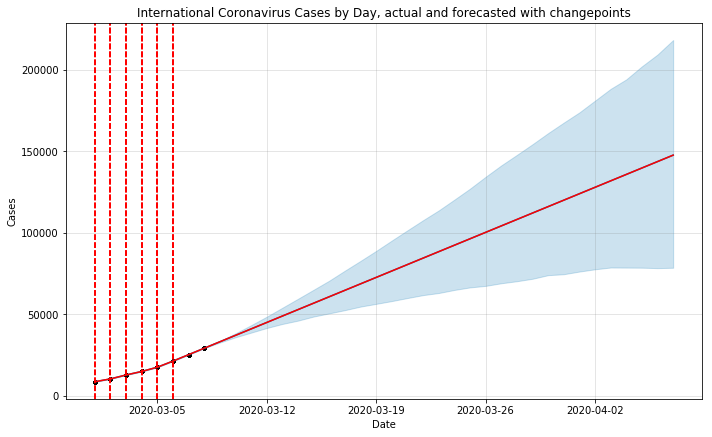

In [170]:
#added change points to forecast
from fbprophet.plot import add_changepoints_to_plot
fig2= gm_prophet_int.plot(forecast_int)
a = add_changepoints_to_plot(fig2.gca(), gm_prophet_int, forecast_int)
plt.title('International Coronavirus Cases by Day, actual and forecasted with changepoints');
axes = fig2.get_axes()
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Cases')


In [171]:
import plotly.express as px


fig = px.line(final_df_international,title="International Cases outside Mainland China", x="Date", y="total_cases", color="name", line_group="name", render_mode="svg")
fig.for_each_trace(lambda t: t.update(name=t.name.replace("name=", "")))
fig.show()

## Flights Analysis

In [172]:
#https://pcfg.eu/posts/how-to-plot-flight-routes-using-plotly/

# Import libraries
import pandas as pd
#import plotly.plotly as py
import plotly.offline as ol
from geographiclib.geodesic import Geodesic
geod = Geodesic.WGS84

# Define function to calculate distance (in meters) between two points
def dist(p1Lat, p1Lon, p2Lat, p2Lon):
    return geod.Inverse(p1Lat, p1Lon, p2Lat, p2Lon, Geodesic.DISTANCE)['s12']

# Read the data into a dataframe (specifying the column names)

#read_conf = pd.read_csv('/Users/neil.watt/Documents/PythonScripts/Coronavirus/coronavirus_stats_conf2.csv', encoding = "ISO-8859-1")


#df = pd.read_csv('routes.dat', sep=',', header=None,
 #                names=['Airline','Airline ID','Source airport','Source airport ID',
  #                      'Destination airport','Destination airport ID','Codeshare',
   #                     'Stops','Equipment'])



df = pd.read_csv('/Users/neil.watt/Documents/PythonScripts/Coronavirus/routes.dat.txt',sep=',', header=None,
                 names=['Airline','Airline ID','Source airport','Source airport ID',
                        'Destination airport','Destination airport ID','Codeshare',
                        'Stops','Equipment'])



In [173]:
# Remove duplicates (only one trajectory per route)
df = df[['Source airport','Destination airport']].drop_duplicates(keep='first', inplace=False)

# Read the data into a dataframe (specifying the column names)
df_airports = pd.read_csv('/Users/neil.watt/Documents/PythonScripts/Coronavirus/airports.dat.txt', sep=',', header=None,
                          names=['Airport','Name','City','Country','IATA','ICAO',
                                 'Latitude','Longitude','Altitude','Timezone','DST',
                                 'Tz','Type','Source'])

In [174]:
## ALL LONDON AIRPORTS

# Select only those routes starting or ending from a London Airport
# in order London City, Heathrow, Gatwick, Luton, Stansted, Southend
df = df.loc[(df['Source airport'].isin(['LCY','LHR','LGW','LTN','STN','SEN'])) | (df['Destination airport'].isin(['LCY','LHR','LGW','LTN','STN','SEN']))]

# Append the origin airport's coordinates to the routes' dataframe
df = pd.merge(df, df_airports[['IATA','Latitude','Longitude']],
              how='inner', left_on='Source airport', right_on='IATA', suffixes=('_Orig','_Dest'))

# Append the destination airport's coordinates to the routes' dataframe
df = pd.merge(df, df_airports[['IATA','Latitude','Longitude']],
              how='inner', left_on='Destination airport', right_on='IATA', suffixes=('_Orig','_Dest'))

# Keep only Origin/Destination IATA ID columns, and their Latitude/Longitude
df = df.drop(columns=['Source airport','Destination airport'])

# Calculate the distance (great circle distance) between the origin and destination airports
df['Distance'] = ''
for index, row in df.iterrows():
    df.loc[df.index==index,'Distance'] = dist(row.Latitude_Orig, row.Longitude_Orig, row.Latitude_Dest, row.Longitude_Dest)/1000

# Initialise the data list that will be used to feed the plot
data = []

# Append all airports (blue dots) to the map
data.append(dict(
                type = 'scattergeo',
                locationmode = 'ISO-3',
                showlegend = False,
                lon = df_airports['Longitude'],
                lat = df_airports['Latitude'],
                hoverinfo = 'text',
                text = df_airports['IATA'],
                mode = 'markers',
                marker = dict(
                    size=2,
                    color='rgb(0, 0, 255)',
                    line = dict(
                        width=3,
                        color='rgba(68, 68, 68, 0)'
                    )
                ))
        )

# Append the longest route to the map
data.append(
        dict(
            type = 'scattergeo',
            locationmode = 'ISO-3',
            name = 'Longest Route',
            showlegend = True,
            lon = [ df.loc[df['Distance']==df['Distance'].max(),'Longitude_Orig'].values[0], df.loc[df['Distance']==df['Distance'].max(),'Longitude_Dest'].values[0] ],
            lat = [ df.loc[df['Distance']==df['Distance'].max(),'Latitude_Orig'].values[0], df.loc[df['Distance']==df['Distance'].max(),'Latitude_Dest'].values[0] ],
            mode = 'lines',
            line = dict(
                width = 2,
                color = 'red',
            ),
            opacity = 1,
        )
    )

# Append all other routes to the map
for i in range(len(df)):
    data.append(
        dict(
            type = 'scattergeo',
            locationmode = 'ISO-3',
            name = str(df['IATA_Orig'][i]) + ' - ' + str(df['IATA_Dest'][i]),
            showlegend = True if df['IATA_Orig'][i] in ['LCY','LHR','LGW','LTN','STN','SEN'] else False,
            lon = [ df['Longitude_Orig'][i], df['Longitude_Dest'][i] ],
            lat = [ df['Latitude_Orig'][i], df['Latitude_Dest'][i] ],
            mode = 'lines',
            line = dict(
                width = 1,
                color = 'green',
            ),
            opacity = 0.3,
        )
    )

# Define the plot's layout
layout = dict(
        title = 'Airports and Routes',
        showlegend = True,
        geo = dict(
            scope='world',
            projection=dict( type='azimuthal equal area' ),
            showland = True,
            landcolor = 'rgb(255, 255, 255)',
            countrycolor = 'rgb(0, 0, 0)',
        ),
    )

# Create the figure to be plotted
fig = dict( data=data, layout=layout )
#py.plot(fig, world_readable=True)
ol.plot(fig, filename='Airports and routes.html')

'Airports and routes.html'

In [175]:
## Indian Airports


df_India=df_airports[df_airports['Country']=='India']
India_list=df_India['IATA'].tolist() 
India_list_new=list(set(India_list))


df_Iran=df_airports[df_airports['Country']=='Iran']
Iran_list=df_Iran['IATA'].tolist() 
Iran_list_new=list(set(Iran_list))

df_China=df_airports[df_airports['Country']=='China']
China_list=df_China['IATA'].tolist() 
China_list_new=list(set(China_list))

df_Italy=df_airports[df_airports['Country']=='Italy']
Italy_list=df_Italy['IATA'].tolist() 
Italy_list_new=list(set(Italy_list))

df_UK=df_airports[df_airports['Country']=='United Kingdom']
UK_list=df_UK['IATA'].tolist() 
UK_list_new=list(set(UK_list))

#final_df_MChina_Hubei=final_df_MChina[final_df_MChina['Province/State']=='Hubei']

#inal_df_MChina_Hubei=final_df_MChina[final_df_MChina['Province/State']=='Hubei']



In [176]:
UK_list_new

['WTN',
 'ILY',
 'QUG',
 'SEN',
 'PZE',
 'FIE',
 'GLA',
 'SWS',
 '\\N',
 'LKZ',
 'CBG',
 'CWL',
 'SYY',
 'LWK',
 'PSL',
 'EOI',
 'WRY',
 'WRT',
 'MSE',
 'LMO',
 'FAB',
 'BWF',
 'QLA',
 'NQT',
 'DSA',
 'LPL',
 'CEG',
 'PPW',
 'NQY',
 'ODH',
 'GLO',
 'BOH',
 'OUK',
 'NCL',
 'MAN',
 'EDI',
 'YEO',
 'TRE',
 'OXF',
 'ISC',
 'KRH',
 'LTN',
 'EXT',
 'DND',
 'FZO',
 'NDY',
 'HLE',
 'CVT',
 'CSA',
 'LYX',
 'FSS',
 'LBA',
 'ABZ',
 'LDY',
 'BHX',
 'HUY',
 'LSI',
 'BFS',
 'HYC',
 'QFO',
 'WIC',
 'KOI',
 'BEX',
 'BRS',
 'BEB',
 'NRL',
 'STN',
 'QUY',
 'BEQ',
 'NHT',
 'PLH',
 'KNF',
 'QCY',
 'BQH',
 'BHD',
 'SOU',
 'SQZ',
 'ESH',
 'HRT',
 'LEQ',
 'PIK',
 'EMA',
 'MME',
 'HAW',
 'BZZ',
 'LGW',
 'CAL',
 'ADX',
 'FFD',
 'SCS',
 'CAX',
 'LYM',
 'NWI',
 'BBS',
 'RCS',
 'BBP',
 'UNT',
 'VLY',
 'INV',
 'SOY',
 'GBA',
 'LCY',
 'OBN',
 'LHR',
 'MHZ',
 'LYE',
 'ENK',
 'BLK',
 'BRR']

In [177]:
['LCY','LHR','LGW','LTN','STN','SEN']

['LCY', 'LHR', 'LGW', 'LTN', 'STN', 'SEN']

In [178]:
# Import libraries
import pandas as pd
#import plotly.plotly as py
import plotly.offline as ol
from geographiclib.geodesic import Geodesic
geod = Geodesic.WGS84

# Define function to calculate distance (in meters) between two points
def dist(p1Lat, p1Lon, p2Lat, p2Lon):
    return geod.Inverse(p1Lat, p1Lon, p2Lat, p2Lon, Geodesic.DISTANCE)['s12']

# Read the data into a dataframe (specifying the column names)

#read_conf = pd.read_csv('/Users/neil.watt/Documents/PythonScripts/Coronavirus/coronavirus_stats_conf2.csv', encoding = "ISO-8859-1")


#df = pd.read_csv('routes.dat', sep=',', header=None,
 #                names=['Airline','Airline ID','Source airport','Source airport ID',
  #                      'Destination airport','Destination airport ID','Codeshare',
   #                     'Stops','Equipment'])



df = pd.read_csv('/Users/neil.watt/Documents/PythonScripts/Coronavirus/routes.dat.txt',sep=',', header=None,
                 names=['Airline','Airline ID','Source airport','Source airport ID',
                        'Destination airport','Destination airport ID','Codeshare',
                        'Stops','Equipment'])


In [179]:
# Remove duplicates (only one trajectory per route)
df = df[['Source airport','Destination airport']].drop_duplicates(keep='first', inplace=False)

# Read the data into a dataframe (specifying the column names)
df_airports = pd.read_csv('/Users/neil.watt/Documents/PythonScripts/Coronavirus/airports.dat.txt', sep=',', header=None,
                          names=['Airport','Name','City','Country','IATA','ICAO',
                                 'Latitude','Longitude','Altitude','Timezone','DST',
                                 'Tz','Type','Source'])

In [180]:
## ALL LONDON AIRPORTS

# Select only those routes starting or ending from a London Airport
# in order London City, Heathrow, Gatwick, Luton, Stansted, Southend

Country_List=UK_list_new

#India_list_new

# note pipemeans OR
#df = df.loc[(df['Source airport'].isin(Iran_list_new)) | (df['Destination airport'].isin(India_list_new))]
df = df.loc[(df['Source airport'].isin(Country_List)) | (df['Destination airport'].isin(Country_List))]

#df = df.loc[(df['Source airport'].isin(['LCY','LHR','LGW','LTN','STN','SEN'])) | (df['Destination airport'].isin(['LCY','LHR','LGW','LTN','STN','SEN']))]

# Append the origin airport's coordinates to the routes' dataframe
df = pd.merge(df, df_airports[['IATA','Latitude','Longitude']],
              how='inner', left_on='Source airport', right_on='IATA', suffixes=('_Orig','_Dest'))

# Append the destination airport's coordinates to the routes' dataframe
df = pd.merge(df, df_airports[['IATA','Latitude','Longitude']],
              how='inner', left_on='Destination airport', right_on='IATA', suffixes=('_Orig','_Dest'))

# Keep only Origin/Destination IATA ID columns, and their Latitude/Longitude
df = df.drop(columns=['Source airport','Destination airport'])

# Calculate the distance (great circle distance) between the origin and destination airports
df['Distance'] = ''
for index, row in df.iterrows():
    df.loc[df.index==index,'Distance'] = dist(row.Latitude_Orig, row.Longitude_Orig, row.Latitude_Dest, row.Longitude_Dest)/1000

# Initialise the data list that will be used to feed the plot
data = []

# Append all airports (blue dots) to the map
data.append(dict(
                type = 'scattergeo',
                locationmode = 'ISO-3',
                showlegend = False,
                lon = df_airports['Longitude'],
                lat = df_airports['Latitude'],
                hoverinfo = 'text',
                text = df_airports['IATA'],
                mode = 'markers',
                marker = dict(
                    size=2,
                    color='rgb(0, 0, 255)',
                    line = dict(
                        width=3,
                        color='rgba(68, 68, 68, 0)'
                    )
                ))
        )

# Append the longest route to the map
data.append(
        dict(
            type = 'scattergeo',
            locationmode = 'ISO-3',
            name = 'Longest Route',
            showlegend = True,
            lon = [ df.loc[df['Distance']==df['Distance'].max(),'Longitude_Orig'].values[0], df.loc[df['Distance']==df['Distance'].max(),'Longitude_Dest'].values[0] ],
            lat = [ df.loc[df['Distance']==df['Distance'].max(),'Latitude_Orig'].values[0], df.loc[df['Distance']==df['Distance'].max(),'Latitude_Dest'].values[0] ],
            mode = 'lines',
            line = dict(
                width = 2,
                color = 'red',
            ),
            opacity = 1,
        )
    )


#India_list_new

# Append all other routes to the map
for i in range(len(df)):
    data.append(
        dict(
            type = 'scattergeo',
            locationmode = 'ISO-3',
            name = str(df['IATA_Orig'][i]) + ' - ' + str(df['IATA_Dest'][i]),
            #showlegend = True if df['IATA_Orig'][i] in India_list_new else False,
            #showlegend = True if df['IATA_Orig'][i] in ['LCY','LHR','LGW','LTN','STN','SEN'] else False,
            lon = [ df['Longitude_Orig'][i], df['Longitude_Dest'][i] ],
            lat = [ df['Latitude_Orig'][i], df['Latitude_Dest'][i] ],
            mode = 'lines',
            line = dict(
                width = 1,
                color = 'green',
            ),
            opacity = 0.3,
        )
    )

# Define the plot's layout
layout = dict(
        title = 'UK Airports and Routes',
      
    title_x=0.5,
    showlegend = False,
        geo = dict(
            scope='world',
            projection=dict( type='azimuthal equal area' ),
            showland = True,
            landcolor = 'rgb(255, 255, 255)',
           # countrycolor = 'rgb(255, 255, 255)',
            showcountries=True, countrycolor="Black"
            #showcountries = True,
            
            
        ),
    #title='Iran Airports and Routes',
    )



# Create the figure to be plotted
fig = dict( data=data, layout=layout )

#py.plot(fig, world_readable=True)
ol.plot(fig, filename='Airports and routes.html')

'Airports and routes.html'

In [181]:
#https://towardsdatascience.com/catching-that-flight-visualizing-social-network-with-networkx-and-basemap-ce4a0d2eaea6

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import mpl_toolkits
import Basemap as Basemap
#from mpl_toolkits.basemap import Basemap as Basemap
#from mpl_toolkits import Basemap as Basemap
#from mpl_toolkits.basemap import Basemap as Basemap

ModuleNotFoundError: No module named 'Basemap'

In [ ]:
graph = nx.from_pandas_dataframe(routes_us, source = 'Source Airport', target = 'Dest Airport', edge_attr = 'number of flights',create_using = nx.DiGraph())